<a href="https://colab.research.google.com/github/SrivikramMV/CSC2031/blob/main/CSC2034_Project_FInal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artefact: Exploratory Data Analysis and Modeling for Wine Quality Prediction

## Introduction

The primary objective of this project is to explore the use of data-driven techniques in predicting wine quality based on various features such as alcohol content, residual sugar, acidity, and more.

Through this project, I seek to gain a deeper understanding of data science methodologies and their application in real-world scenarios. By analyzing a dataset containing information about red and white wines, I intend to explore the relationships between different wine attributes and quality ratings.

## Task 1A: Distribution of Wine Quality





Before analyzing the distribution of wine quality, I felt curious about how quality varies across different types of wine. To achieve this task, I'm going to load the red and white wine datasets and merged the datasets into a single dataframe.

In [2]:
import pandas as pd

red_wine_file = "winequality-red.csv"
red_wine_df = pd.read_csv(red_wine_file, sep=';')

white_wine_file = "winequality-white.csv"
white_wine_df = pd.read_csv(white_wine_file, sep=';')

red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'

combined_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

print(combined_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red  
1      9.8        5   

In [3]:
wine_quality_stats = combined_df.groupby('wine_type')['quality'].describe()

print(wine_quality_stats)

            count      mean       std  min  25%  50%  75%  max
wine_type                                                     
red        1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white      4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0


Having now also computed the summary statistics, I'm going to visualize the distribution of wine quality using a box plot to compare the quality distributions between red and white wines visually.

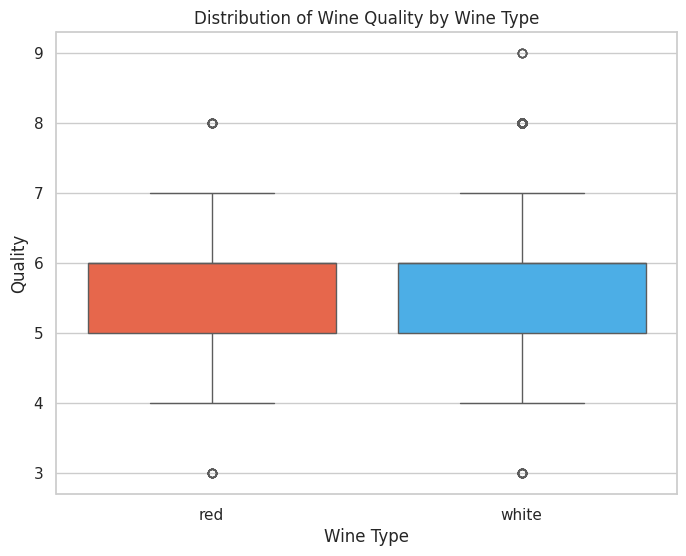

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='wine_type', y='quality', data=combined_df, hue = 'wine_type', palette=["#FF5733", "#33B5FF"])
plt.title('Distribution of Wine Quality by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Quality')
plt.show()

Using this approach, I was able to describe the distribution of wine quality across all samples, separately for red and white wines, and compare the quality distributions between reds and whites. Further details can be found in my report under Task 1A.

## Task 1B: Discretization of Alcohol Content

Setting the Boundaries: Calculating the Mean and Standard Deviation

I am computing the mean (x̄) and standard deviation (σ) of the alcohol content variable for red wine. Then, I can determine the low threshold by subtracting the standard deviation from the mean (x̄ - σ) and the high threshold by adding the standard deviation to the mean (x̄ + σ). These thresholds will help me define the "low," "mid," and "high" ranges of alcohol content, providing a basis for discretization.

In [7]:
red_mean_alcohol = red_wine_df['alcohol'].mean()
red_std_alcohol = red_wine_df['alcohol'].std()

print("Mean alcohol content (red wine):", red_mean_alcohol)
print("Standard deviation of alcohol content (red wine):", red_std_alcohol)

print("-----------------------------------------------------------------------")

low_threshold_red = red_mean_alcohol - red_std_alcohol
high_threshold_red = red_mean_alcohol + red_std_alcohol

print("Low threshold for alcohol content (red wine):", low_threshold_red)
print("High threshold for alcohol content (red wine):", high_threshold_red)

Mean alcohol content (red wine): 10.422983114446529
Standard deviation of alcohol content (red wine): 1.0656675818473946
-----------------------------------------------------------------------
Low threshold for alcohol content (red wine): 9.357315532599134
High threshold for alcohol content (red wine): 11.488650696293924


With this, I can now create the 3-valued "alcohol_cat" variable

In [8]:
import numpy as np

red_wine_df['alcohol_cat'] = pd.cut(red_wine_df['alcohol'], bins=[-np.inf, low_threshold_red, high_threshold_red, np.inf], labels=['low', 'mid', 'high'])
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,alcohol_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,mid
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mid
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,mid


The same process can now be applied for white wine as well.

In [9]:
white_mean_alcohol = white_wine_df['alcohol'].mean()
white_std_alcohol = white_wine_df['alcohol'].std()

print("Mean alcohol content (white wine):", white_mean_alcohol)
print("Standard deviation of alcohol content (white wine):", white_std_alcohol)

print("-----------------------------------------------------------------------")

low_threshold_white = white_mean_alcohol - white_std_alcohol
high_threshold_white = white_mean_alcohol + white_std_alcohol

print("Low threshold for alcohol content (white wine):", low_threshold_white)
print("High threshold for alcohol content (white wine):", high_threshold_white)

Mean alcohol content (white wine): 10.514267047774602
Standard deviation of alcohol content (white wine): 1.230620567757318
-----------------------------------------------------------------------
Low threshold for alcohol content (white wine): 9.283646480017284
High threshold for alcohol content (white wine): 11.74488761553192


In [10]:
white_wine_df['alcohol_cat'] = pd.cut(white_wine_df['alcohol'], bins=[-np.inf, low_threshold_white, high_threshold_white, np.inf], labels=['low', 'mid', 'high'])
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,alcohol_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,low
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,mid
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,mid
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,mid
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,mid


## Task 1C: Analysis of Wine Quality by Alcohol Content


In this task, I aim to analyze the distribution of wine quality scores based on different levels of alcohol content. To achieve this, I'll create visualizations separately for low-, mid-, and high-alcohol content categories for both red and white wines.

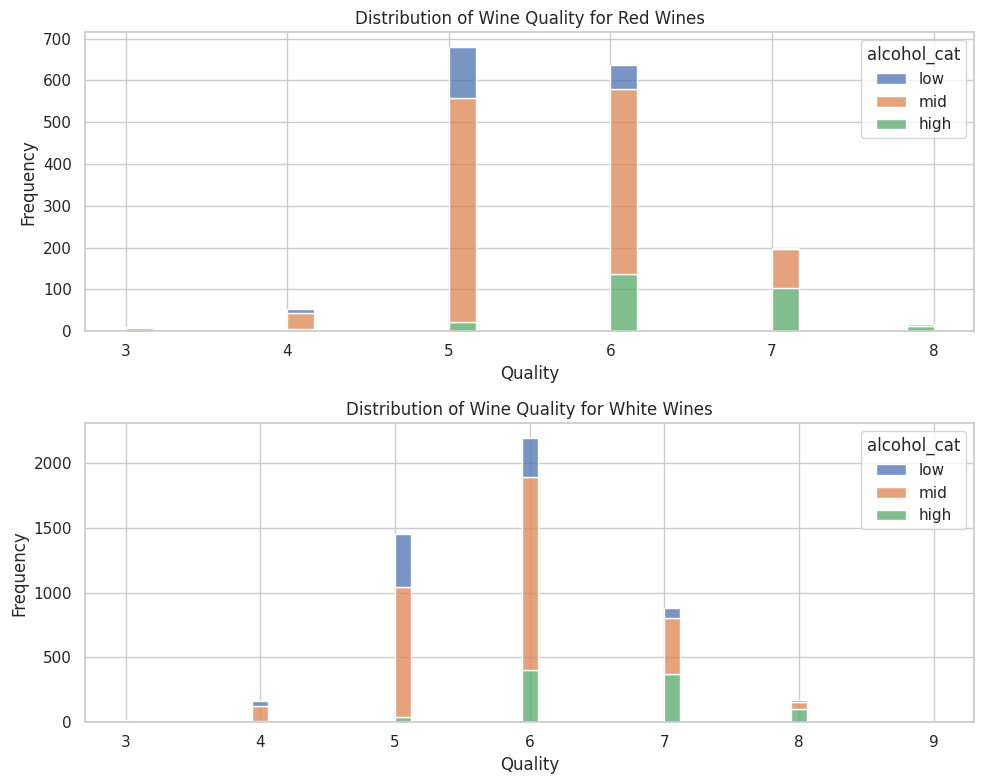

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(data=red_wine_df, x='quality', hue='alcohol_cat', multiple='stack', ax=axes[0])
axes[0].set_title('Distribution of Wine Quality for Red Wines')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Frequency')

sns.histplot(data=white_wine_df, x='quality', hue='alcohol_cat', multiple='stack', ax=axes[1])
axes[1].set_title('Distribution of Wine Quality for White Wines')
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The visualizations presented here provide a clear overview of the distribution of wine quality scores based on different levels of alcohol content for both red and white wines. Further insights and observations regarding the relationship between alcohol content and wine quality can be found in Task 1C of my report.

## Task 1D: Plotting Residual Sugar and Creating the IsSweet Variable

I'll begin by visualizing the distribution of residual sugar in both red and white wines using a histogram. This visualization will provide insights into the sweetness profile of the wines.

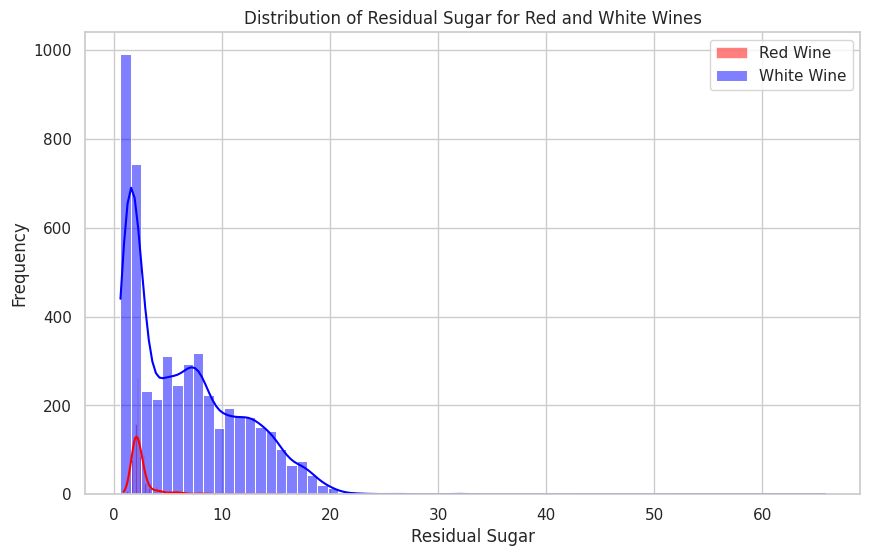

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(data=red_wine_df, x='residual sugar', color='red', label='Red Wine', kde=True)
sns.histplot(data=white_wine_df, x='residual sugar', color='blue', label='White Wine', kde=True)

plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.title('Distribution of Residual Sugar for Red and White Wines')

plt.legend()

plt.show()

Upon examination, a threshold of 3.5 seems appropriate as it represents the lowest point for both the red and white wine lines between their maximum points. This threshold would effectively balance the dataset into two classes, allowing for a balanced classification model.



## Task 1E: Distribution Analysis of Quality vs. IsSweet

Using the threshold value from Task 1D, I can create a binary variable called 'isSweet,' through which I can categorize wines based on their sweetness level.

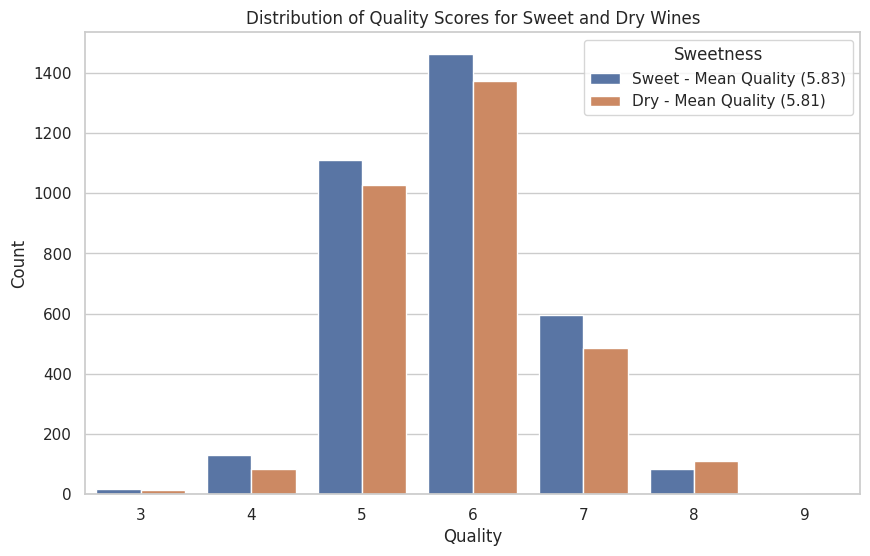


Mean Quality of Sweet wines: 5.828543752018082
Mean Quality of Dry wines: 5.809117647058824


In [20]:
threshold_sweetness = 3.5

def label_sweetness(residual_sugar):
    if residual_sugar >= threshold_sweetness:
        return 'sweet'
    else:
        return 'dry'

combined_df['isSweet'] = combined_df['residual sugar'].apply(label_sweetness)

mean_quality_sweet = combined_df[combined_df['isSweet'] == 'sweet']['quality'].mean()
mean_quality_dry = combined_df[combined_df['isSweet'] == 'dry']['quality'].mean()

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='quality', hue='isSweet')
plt.title('Distribution of Quality Scores for Sweet and Dry Wines')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.legend(title='Sweetness', loc='upper right', labels=[f'Sweet - Mean Quality ({mean_quality_sweet:.2f})', f'Dry - Mean Quality ({mean_quality_dry:.2f})'])

plt.show()

print()
print("Mean Quality of Sweet wines:", mean_quality_sweet)
print("Mean Quality of Dry wines:", mean_quality_dry)


The plot indicates that there are more dry wines than sweet wines, but most notable the mean quality values points towards Sweet wines being of marginally higher quality. My final thoughts about this can be found under Task 1E in my report.